# Assignment 05 - Bhuvnesh Sharma

In this notebook, we will explore data San Franisco Bike Sharing company from the BigQuery data set .
We will be using the Bay Area Bike Share Trips Data from BigQuery.


## Problem Statement
At Ford GoBike (https://www.fordgobike.com/), the company running Bay Area Bikeshare. We are trying to increase ridership, and you want to offer deals through the mobile app to do so. What deals do you offer though? Currently, your company has three options: a flat price for a single one-way trip, a day pass that allows unlimited 30-minute rides for 24 hours and an annual membership.

Through this project, the questions which are trying to address are:

###### What are the 5 most popular trips that you would call "commuter trips"?
###### What are your recommendations for offers (justify based on your findings)?


Let's start off with the Python imports that we need.

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import shutil
%matplotlib inline

Lets explore the data set and get some basic. Perform the exploratory analysis on the data set .

What's the size of this dataset? (i.e., how many trips)

In [67]:
!bq query --use_legacy_sql=false ' SELECT count(*) FROM `bigquery-public-data.san_francisco.bikeshare_trips`'
!bq query --use_legacy_sql=false ' SELECT count(*) FROM `bigquery-public-data.san_francisco.bikeshare_status`'

!bq query --use_legacy_sql=false 'SELECT COUNT(trip_id) , WHICHSTARTYEAR FROM (SELECT trip_id, EXTRACT(YEAR FROM start_date) WHICHSTARTYEAR FROM `bigquery-public-data.san_francisco.bikeshare_trips`) GROUP BY WHICHSTARTYEAR '





Waiting on bqjob_r7e5ffef1db1c7479_0000016410a816bf_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 983648 |
+--------+
Waiting on bqjob_r5a5986d4944276ad_0000016410a822d9_1 ... (0s) Current status: DONE   
+-----------+
|    f0_    |
+-----------+
| 107501619 |
+-----------+
Waiting on bqjob_r4442e94357fac4ab_0000016410a82e7e_1 ... (1s) Current status: DONE   
+--------+----------------+
|  f0_   | WHICHSTARTYEAR |
+--------+----------------+
| 346252 |           2015 |
| 210494 |           2016 |
| 326339 |           2014 |
| 100563 |           2013 |
+--------+----------------+


The bigquery-public-data.san_francisco.bikeshare_status table has 107501619 rows of transaction data where as bigquery-public-data.san_francisco.bikeshare_trips has 983648.

The data is from 4 years of data from 2013 to 2016.

#### What is the earliest start time and latest end time for a trip?


In [5]:
!bq query --use_legacy_sql=false ' SELECT MIN(start_date) EARLIESTSTARTDATE, MAX(end_date) LATESTENDDATE FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r6ba0ab954406f145_000001640ffe95f2_1 ... (1s) Current status: DONE   
+---------------------+---------------------+
|  EARLIESTSTARTDATE  |    LATESTENDDATE    |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+


This is also showing that the data spans from 2013 Aug to 2016 Aug.

#### How many bikes are there? We can get the number of bikes from bikeshare_trip table via bike_number column. We are also using distinct and count functions

In [6]:
!bq query --use_legacy_sql=false ' SELECT COUNT(DISTINCT bike_number) DISTINCT_BIKES_COUNT FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r9fb9749aad10aa6_000001641001718b_1 ... (0s) Current status: DONE   
+----------------------+
| DISTINCT_BIKES_COUNT |
+----------------------+
|                  700 |
+----------------------+


    The Total number of bikes is 700.

#### How many trips are in the morning vs in the afternoon?
    Morning trips are defined as trips that began between morning hours (morning 5 AM to 11 AM) and ended in the same hours

    Evening trips are defined as trips that begain between evening hours (between 3 PM and 9 PM) and ended in the same hours

In [20]:
! bq query --use_legacy_sql=false --format=csv 'SELECT COUNTIF((EXTRACT(HOUR FROM start_date)>5 AND EXTRACT(HOUR FROM start_date)<=11) AND (EXTRACT(HOUR FROM end_date)>5 AND EXTRACT(HOUR FROM end_date)<=11 )) AS MORNINGTRIPS, COUNTIF( (EXTRACT(HOUR FROM start_date)>15 AND EXTRACT(HOUR FROM start_date)<=21) AND (EXTRACT(HOUR FROM end_date)>15 AND EXTRACT(HOUR FROM end_date)<=21 )) AS EVENINGTRIPS FROM `bigquery-public-data.san_francisco.bikeshare_trips`' > MORNINGEVENING.csv

Waiting on bqjob_r7726e8cd5d92ae45_00000164101cb4b7_1 ... (0s) Current status: DONE   

In [25]:
tripstiming=pd.read_csv('MORNINGEVENING.csv')
tripstiming

MORNINGTRIPS  EVENINGTRIPS
0        385873        375263

Morning Trips counts are similar to what evening number trips .
    
    Morning Trips have been identified as all trips which happen between morning 5 AM to 11 AM. These trips can be associated with morning commute time.
    Evening Trips have been identified as all trips which happen between morning 3 PM to 9 PM. These trips can be associated with evening commute time.
    
    The intent was to compare how the morning commute trips to evening commute trips. Over a span of 4 years it seems that the commuters have used morning hours around 100000 incidents more. This suggests that we can target our promotions more in the morning times.
    
    Also data seems to suggest that the commutors that take bikes in the morning use a different transportation in the evening. We would have to explore the data more to confirm.



#### What are the top 40 most popular routes with the consumers? or Most popular commuter trips.


In [73]:
! bq query --use_legacy_sql=false --format=csv ' SELECT COUNT( trip_id ) FREQUENCY, start_station_name, end_station_name FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY FREQUENCY DESC LIMIT 40' > popularroutes.csv

Waiting on bqjob_r3107fccbe422ded_0000016410b1fccc_1 ... (0s) Current status: DONE   

FREQUENCY                             start_station_name  \
0        9150           Harry Bridges Plaza (Ferry Building)   
1        8508        San Francisco Caltrain 2 (330 Townsend)   
2        7620                                2nd at Townsend   
3        6888           Harry Bridges Plaza (Ferry Building)   
4        6874                         Embarcadero at Sansome   
5        6836                                Townsend at 7th   
6        6351                          Embarcadero at Folsom   
7        6215       San Francisco Caltrain (Townsend at 4th)   
8        6039                              Steuart at Market   
9        5959                              Steuart at Market   
10       5796  Temporary Transbay Terminal (Howard at Beale)   
11       5395           Harry Bridges Plaza (Ferry Building)   
12       5358                                Townsend at 7th   
13       5337                              2nd at South Park   
14       5196       San Francisco Caltrain (Townsend at 4th)   
15       5118                                 Market at 10th   
16       5110                              Steuart at Market   
17       5063                              Market at Sansome   
18       4737                         Embarcadero at Sansome   
19       4492        San Francisco Caltrain 2 (330 Townsend)   
20       4440       San Francisco Caltrain (Townsend at 4th)   
21       4433        San Francisco Caltrain 2 (330 Townsend)   
22       4417                             Powell Street BART   
23       4367       San Francisco Caltrain (Townsend at 4th)   
24       4304                                  Howard at 2nd   
25       4273                                2nd at Townsend   
26       3852                 Mountain View Caltrain Station   
27       3818                                  Market at 4th   
28       3801       San Francisco Caltrain (Townsend at 4th)   
29       3771                                Townsend at 7th   
30       3755        San Francisco Caltrain 2 (330 Townsend)   
31       3749                              Market at Sansome   
32       3698              Civic Center BART (7th at Market)   
33       3610                                 Market at 10th   
34       3597                                  2nd at Folsom   
35       3520                        Mountain View City Hall   
36       3468       San Francisco Caltrain (Townsend at 4th)   
37       3451                                Beale at Market   
38       3292                                  2nd at Folsom   
39       3222                                  5th at Howard   

                                 end_station_name  
0                          Embarcadero at Sansome  
1                                 Townsend at 7th  
2            Harry Bridges Plaza (Ferry Building)  
3                                 2nd at Townsend  
4                               Steuart at Market  
5         San Francisco Caltrain 2 (330 Townsend)  
6        San Francisco Caltrain (Townsend at 4th)  
7            Harry Bridges Plaza (Ferry Building)  
8                                 2nd at Townsend  
9        San Francisco Caltrain (Townsend at 4th)  
10       San Francisco Caltrain (Townsend at 4th)  
11       San Francisco Caltrain (Townsend at 4th)  
12       San Francisco Caltrain (Townsend at 4th)  
13                              Market at Sansome  
14  Temporary Transbay Terminal (Howard at Beale)  
15        San Francisco Caltrain 2 (330 Townsend)  
16                         Embarcadero at Sansome  
17                              2nd at South Park  
18           Harry Bridges Plaza (Ferry Building)  
19                             Powell Street BART  
20                          Embarcadero at Folsom  
21                                  5th at Howard  
22        San Francisco Caltrain 2 (330 Townsend)  
23                              Steuart at Market  
24       San Francisco Caltrain (Townsend at 4th)  
25                         

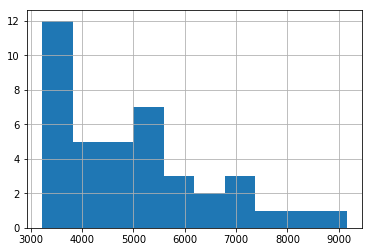

In [74]:
pop_trips=pd.read_csv('popularroutes.csv')

pop_trips.FREQUENCY.hist()
pop_trips

    Route between Harry Bridges Plaza (Ferry Building) Embarcadero at Sansome is the most popular route. The popular routes have had almost 3 times usage compared to some routes. We need to compare this data with analysis around when bikes are not available.
    If there are corelations with more frequent data to data where bikes are running out. This might be an indication that we can need to increase number of bikes on those stations.



#### Avergage Commute time via bike during the morning , evening hours?

In [31]:
! bq query --use_legacy_sql=false 'SELECT AVG(TIMESTAMP_DIFF(end_date , start_date,MINUTE)) as MORNINGCOMMUTETIME FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE (EXTRACT(HOUR FROM start_date)>5 AND EXTRACT(HOUR FROM start_date)<=11) AND (EXTRACT(HOUR FROM end_date)>5 AND EXTRACT(HOUR FROM end_date)<=11 )'

Waiting on bqjob_r2fcc8c847a3a03e9_00000164102f7817_1 ... (1s) Current status: DONE   
+--------------------+
| MORNINGCOMMUTETIME |
+--------------------+
| 10.267453281260776 |
+--------------------+


In [33]:
! bq query --use_legacy_sql=false ' SELECT AVG(TIMESTAMP_DIFF(end_date , start_date,MINUTE)) as EVENINGCOMMUTETIME FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE (EXTRACT(HOUR FROM start_date)>15 AND EXTRACT(HOUR FROM start_date)<=21) AND (EXTRACT(HOUR FROM end_date)>15 AND EXTRACT(HOUR FROM end_date)<=21 )'

Waiting on bqjob_r338d53514c86c945_000001641031b22e_1 ... (1s) Current status: DONE   
+--------------------+
| EVENINGCOMMUTETIME |
+--------------------+
| 12.665109536511721 |
+--------------------+


    Clearly the evening commute average is higher even though the number of evening commutes.
    Possible explanation can be the following
        - Possibly the traffic may be the reason 
        - More people use bikes in the evenings for recreation. Hence more people are using bikes for commutes. 
    Users of this service have a bike almost 2.5 mins more than users in the morning hours. This can indicate that can target more promotions correctly.
        

#### What is the Peak usage timing for bikes rides ?

In [34]:
! bq query --use_legacy_sql=false --format=csv 'SELECT COUNT(EXTRACT(HOUR FROM start_date)) as FREQUENCY , EXTRACT(HOUR FROM start_date) HOUR FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by HOUR order by FREQUENCY DESC' > frequency.csv

Waiting on bqjob_r308dcf6ce70b9d9d_000001641037064e_1 ... (1s) Current status: DONE   

In [49]:
freq_trips=pd.read_csv('frequency.csv')
freq_trips

FREQUENCY  HOUR
0      132464     8
1      126302    17
2       96118     9
3       88755    16
4       84569    18
5       67531     7
6       47626    15
7       46950    12
8       43714    13
9       42782    10
10      41071    19
11      40407    11
12      37852    14
13      22747    20
14      20519     6
15      15258    21
16      10270    22
17       6195    23
18       5098     5
19       2929     0
20       1611     1
21       1398     4
22        877     2
23        605     3

    Clearly morning 8 AM, 9 AM , 7 AM and evening 17 PM, 16 PM , 18 PM are the key peak usage hours . 
  
    Options
          1.) Need promotion pricing on non peak hours so that we can encourage users to use non peak hours at more discounted prices. We would later see that some times we have same time slots when we run out of bikes.
          2.) We can consider promotion campaigns and also differential pricing at on following time slots
              a.) 6 AM to 6:59 AM
              b.) 5 AM to 5:59 AM
              c.) 10 AM to 15 PM
              d.) 20 PM to 23:59 PM
              e.) 0 to 4:59 AM


#### What is most popular bike across all routes and also find the duration of the bike commute time.

In [97]:
! bq query --use_legacy_sql=false 'SELECT COUNT( bike_number ) FREQUENCY , bike_number , sum( duration_sec ) SECONDS FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY bike_number ORDER BY FREQUENCY DESC LIMIT 700 '

Waiting on bqjob_r1a21b65128c5cd1_0000016410da48cb_1 ... (0s) Current status: DONE   
+-----------+-------------+---------+
| FREQUENCY | bike_number | SECONDS |
+-----------+-------------+---------+
|      2872 |         389 | 2711439 |
|      2853 |         524 | 2984643 |
|      2853 |         392 | 2530024 |
|      2845 |         503 | 2821083 |
|      2827 |         328 | 2511687 |
|      2823 |         415 | 2999013 |
|      2822 |         558 | 2495749 |
|      2821 |         631 | 2632027 |
|      2821 |         585 | 2346656 |
|      2818 |         463 | 2344559 |
|      2812 |         267 | 2449275 |
|      2805 |         368 | 2403197 |
|      2798 |         592 | 2427208 |
|      2792 |         366 | 2497452 |
|      2792 |         625 | 2717745 |
|      2791 |         421 | 2530245 |
|      2791 |         334 | 2543160 |
|      2789 |         573 | 2696513 |
|      2782 |         614 | 2373542 |
|      2778 |         497 | 2484957 |
|      2778 |         461 | 2415495 |
| 

    Based on the data it seems that the most popular bike (could be pure chance ) has been used 231 trips more than least used bike.
    One possible explanation of this could be that the cleaniness or condition of the bikes. There is possibility that the some bikes are getting preferred than the others because either they are clean or better maintained. This should be more studied if condition or cleaniness of the bike is playing a role in selection of the bike by the customer.
  

#### Top 10 Stations which run out of bikes most frequently ?

In [52]:
! bq query --use_legacy_sql=false --format=csv  'SELECT BIKE_STATUS.NOBIKES, BIKE_STATUS.bikes_available, name, dockcount FROM `bigquery-public-data.san_francisco.bikeshare_stations` bikeshare_stations JOIN ( SELECT COUNT(station_id) AS NOBIKES, station_id AS STATION_ID, bikes_available FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE bikes_available=0 GROUP BY station_id, bikes_available ) BIKE_STATUS ON bikeshare_stations.station_id=BIKE_STATUS.STATION_ID WHERE BIKE_STATUS.NOBIKES > 10000 ORDER BY BIKE_STATUS.NOBIKES DESC LIMIT 10' > nobikes.csv

Waiting on bqjob_r66733a1b8c190b40_000001641049c1e8_1 ... (0s) Current status: DONE   

In [53]:
freq_trips=pd.read_csv('nobikes.csv')
freq_trips

NOBIKES  bikes_available                                      name  \
0    44844                0                             2nd at Folsom   
1    44728                0                  Commercial at Montgomery   
2    35903                0                    Embarcadero at Vallejo   
3    32980                0                    Embarcadero at Sansome   
4    32505                0                           Clay at Battery   
5    32027                0  San Francisco Caltrain (Townsend at 4th)   
6    31733                0           Grant Avenue at Columbus Avenue   
7    30800                0                             Market at 4th   
8    27938                0                             Howard at 2nd   
9    25496                0                 Broadway St at Battery St   

   dockcount  
0         19  
1         15  
2         15  
3         15  
4         15  
5         19  
6         19  
7         19  
8         19  
9         15

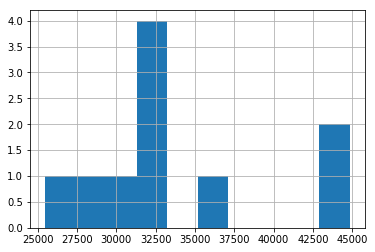

In [98]:
freq_trips.NOBIKES.hist()

    2nd at Folsom AND Commercial at Montgomery	have been the  stations that runs out of bikes most frequently. This has run out of bikes more than 19 K compared to Broadway St at Battery St in last 4 years. We need to dig into the reason of why this is happening .
    
    Possible explanations of this could be that 
    1.) 2nd at Folsom AND Commercial at Montgomery are the most popular stations. 
        a.) Interestingly 2nd at Folsom	only show up on 34th and 36th popular routes.
        b.) Commercial at Montgomery does not show up on most popular routes.
        c.) There is something strange happening at these stations , we need to investigate.
    2.) Do we have issues in our data collection ?

#### What are the most popular zip codes entered by the users ? 

In [54]:
! bq query --use_legacy_sql=false 'SELECT COUNT( trip_id ) FREQUENCY, zip_code FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY zip_code ORDER BY FREQUENCY DESC LIMIT 10 '

Waiting on bqjob_r6c517bd9866b1e78_00000164104b9a5c_1 ... (0s) Current status: DONE   
+-----------+----------+
| FREQUENCY | zip_code |
+-----------+----------+
|    106913 | 94107    |
|     61232 | 94105    |
|     46544 | 94133    |
|     38072 | 94103    |
|     33642 | 94111    |
|     30222 | 94102    |
|     19043 | 94109    |
|     15420 | 95112    |
|     15385 | nil      |
|     13673 | 94158    |
+-----------+----------+


    Although the data clearly marks that this might not be very reliable data as users may not fill it up at all or may fill it incorrectly. But still with current data that between zip codes 94107 and 94158 usage is almost 8 times. Infact zipcode 94107 has frequency almost 40 K more than the nearest zip code.
    
    Options
    1.) Consider mobile campaigns in zipcode 94107.
    2.) Possibly open more stations in that zipcode.


#### Find out which station runs out of bikes and in which hour of the day. Limit this analysis for the stations which have more than 20000 instances when bikes were not there.

    For the Morning and evening commute hours which hours have missing bikes (or station does not have bike) most number of times.

In [57]:
! bq query --use_legacy_sql=false --format=csv 'SELECT COUNT(station_id) FREQUENCY, station_id STATION_ID, EXTRACT(HOUR FROM time) HOUROFTHEDAY FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE bikes_available=0 AND station_id IN ( SELECT bikeshare_stations.station_id FROM `bigquery-public-data.san_francisco.bikeshare_stations` bikeshare_stations JOIN ( SELECT COUNT(station_id) AS NOBIKES, station_id, bikes_available FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE bikes_available=0 GROUP BY station_id, bikes_available ) BIKE_STATUS ON bikeshare_stations.station_id=BIKE_STATUS.STATION_ID WHERE BIKE_STATUS.NOBIKES > 20000 ) AND (EXTRACT(HOUR FROM time)>5 AND EXTRACT(HOUR FROM time)<=11) OR (EXTRACT(HOUR FROM time)>15 AND EXTRACT(HOUR FROM time)<=21) GROUP BY EXTRACT(HOUR FROM time), station_id' > nobike.csv

Waiting on bqjob_rf30cb63cb571c42_0000016410521b99_1 ... (0s) Current status: DONE   

In [100]:
nobike=pd.read_csv('nobike.csv')
nobike

FREQUENCY  STATION_ID  HOUROFTHEDAY
0        3216          45             6
1         786          65             6
2         853          56             6
3        1658          60             6
4        1151          63             6
5         879          73             6
6         641          82             6
7         968          32             6
8        3168          41             6
9         778          64             6
10        422          71             6
11          8          70             6
12       1435          48             6
13       2096          76             6
14       2786          62             6
15       1631          41             7
16       1080          63             7
17        108          69             7
18        141          54             7
19        981          64             7
20       1731          65             7
21       2343          45             7
22       1192          73             7
23       1500          32             7
24       2400          62             7
25        792          71             7
26        523          70             7
27        700          76             7
28       2370          82             7
29       3266          48             7
..        ...         ...           ...
70       1643          56            10
71         59          48            10
72        268          32            10
73         75          65            10
74         91          82            10
75         57          63            10
76        400          60            10
77        152          64            10
78       6065          70            10
79        188          76            10
80         96          82            11
81        209          32            11
82         24          64            11
83        202          65            11
84       1962          69            11
85        508          62            11
86        335          76            11
87       4303          70            11
88        173          41            11
89       2051          54            11
90         65          63            11
91       2351          71            11
92         63          45            11
93       2384          73            11
94       1029          56            11
95      64263          24            16
96      51322          83            16
97      56448          82            16
98      64432          23            16
99      51927          84            16

[100 rows x 3 columns]

In [101]:
nobike.FREQUENCY.max()

64432

    Station id 24 has been out of bikes 64432 times in the peak hours of 16 PM . We need to optimize the bike allocation from these stations.
    Possible solutions is
    1.) Provide discounts for users to use commuter routes which have stations which run out of bikes. This can encourage users to drop bikes at those stations.

In [99]:
nobike.HOUROFTHEDAY.max()

16

In [88]:
nobike.HOUROFTHEDAY.hist()

    We are missing bikes more frequently in the morning commute hours than in the evening. We need to consider the following
    1.) Provide real time discounts to the users if they can drop the bike to an alternate station which is running low on bikes.
    

In [65]:
nobike.STATION_ID.hist()

#### What is the cummulative commute time between different customer types.

In [66]:
! bq query --use_legacy_sql=false 'SELECT COUNT( trip_id ) FREQUENCY , subscriber_type , sum( duration_sec ) SECONDS FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type ORDER BY FREQUENCY DESC '

Waiting on bqjob_r3d0c4b27d75f6f35_000001641055df81_1 ... (0s) Current status: DONE   
+-----------+-----------------+-----------+
| FREQUENCY | subscriber_type |  SECONDS  |
+-----------+-----------------+-----------+
|    846839 | Subscriber      | 493507486 |
|    136809 | Customer        | 508763279 |
+-----------+-----------------+-----------+


#### Most popular commuter trips

In [33]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT trip, start_station_name, end_station_name, count(trip) as trip_freq FROM `ambient-cubist-185918.bike_trips_data.results_20171228_104735` GROUP BY trip, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv


Waiting on bqjob_r7765f1159d9e5705_000001616781b101_1 ... (0s) Current status: DONE   

In [34]:
pop_trips=pd.read_csv('result.csv')

In [35]:
pop_trips

trip                       start_station_name  \
0  50_60     Harry Bridges Plaza (Ferry Building)   
1  69_65  San Francisco Caltrain 2 (330 Townsend)   
2  61_50                          2nd at Townsend   
3  50_61     Harry Bridges Plaza (Ferry Building)   
4  60_74                   Embarcadero at Sansome   

                       end_station_name  trip_freq  
0                Embarcadero at Sansome       9150  
1                       Townsend at 7th       8508  
2  Harry Bridges Plaza (Ferry Building)       7620  
3                       2nd at Townsend       6888  
4                     Steuart at Market       6874

In [36]:
pop_trips.trip_freq.hist()

In [106]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT * FROM `bigquery-public-data.san_francisco.bikeshare_trips` limit 10' > results.csv

Waiting on bqjob_r4c1e141ab4662cfe_0000016410f8b323_1 ... (0s) Current status: DONE   

In [107]:
pop_trips=pd.read_csv('results.csv')

In [108]:
pop_trips

trip_id  duration_sec           start_date start_station_name  \
0   984595          5957  2015-10-25 18:12:00              Mezes   
1   984596          5913  2015-10-25 18:13:00              Mezes   
2  1102641           801  2016-02-23 12:25:00              Mezes   
3   944732          2618  2015-09-24 17:22:00              Mezes   
4  1030383          5780  2015-12-06 10:52:00              Mezes   
5  1129385          6079  2016-03-18 10:33:00              Mezes   
6  1129386          6032  2016-03-18 10:33:00              Mezes   
7   969490           255  2015-10-13 19:02:00              Mezes   
8   947105          1008  2015-09-26 12:57:00              Mezes   
9  1011650            60  2015-11-16 18:54:00              Mezes   

   start_station_id             end_date end_station_name  end_station_id  \
0                83  2015-10-25 19:51:00            Mezes              83   
1                83  2015-10-25 19:51:00            Mezes              83   
2                83  2016-02-23 12:39:00            Mezes              83   
3                83  2015-09-24 18:06:00            Mezes              83   
4                83  2015-12-06 12:28:00            Mezes              83   
5                83  2016-03-18 12:14:00            Mezes              83   
6                83  2016-03-18 12:13:00            Mezes              83   
7                83  2015-10-13 19:07:00            Mezes              83   
8                83  2015-09-26 13:13:00            Mezes              83   
9                83  2015-11-16 18:55:00            Mezes              83   

   bike_number zip_code subscriber_type  
0           52      nil        Customer  
1          121      nil        Customer  
2          174    93292        Customer  
3          653    94063        Customer  
4           44    94064        Customer  
5          208    94070        Customer  
6          155    94070        Customer  
7          650    94063      Subscriber  
8          157    94063      Subscriber  
9           35    94124      Subscriber

## Summary

### Recommendations
      a.) Consider mobile campaigns in zipcode 94107.
      b.) Possibly open more stations in that zipcode.
      c.) Provide real time discounts (VIA MOBILE APP) to the users if they can drop the bike to an alternate station which is running low on bikes.
      d.) Provide discounts for users (VIA MOBILE APP) to use commuter routes which have stations which run out of bikes. This can encourage users to drop bikes at those stations.
      e.) Seems cleaniness and condition might play a role on bike selection. Consider features in mobile app for reporting around condition and cleaness of the bike.
      f.) Need promotion pricing on non peak hours so that we can encourage users to use non peak hours at more discounted prices. We would later see that some times we have same time slots when we run out of bikes.
      e.) We can consider promotion campaigns and also differential pricing at on following time slots
              a.) 6 AM to 6:59 AM
              b.) 5 AM to 5:59 AM
              c.) 10 AM to 15 PM
              d.) 20 PM to 23:59 PM
              e.) 0 to 4:59 AM
      f.) Target users in the evening as they spend more time on the bike in the evening.        
      